In [1]:
%matplotlib notebook
from matplotlib import pyplot as plot
from matplotlib import cm

In [2]:
import numpy
from collections import OrderedDict

In [3]:
fname = './routes.dat'

In [ ]:
# Airport ID	Unique OpenFlights identifier for this airport.
# Name	Name of airport. May or may not contain the City name.
# City	Main city served by airport. May be spelled differently from Name.
# Country	Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
# IATA	3-letter IATA code. Null if not assigned/unknown.
# ICAO	4-letter ICAO code.
# Null if not assigned.
# Latitude	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
# Longitude	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
# Altitude	In feet.
# Timezone	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
# DST	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
# Tz database time zone	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
# Type	Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
# Source	Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.

In [44]:
aid2city = OrderedDict()

idx = 0
with open('./airports-extended.dat', 'r') as f:
    for line in f:
        ll = line.strip().split(',')
        aid2city[ll[0]] = ll[2]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


In [35]:
# Airline	2-letter (IATA) or 3-letter (ICAO) code of the airline.
# Airline ID	Unique OpenFlights identifier for airline (see Airline).
# Source airport	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
# Source airport ID	Unique OpenFlights identifier for source airport (see Airport)
# Destination airport	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
# Destination airport ID	Unique OpenFlights identifier for destination airport (see Airport)
# Codeshare	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
# Stops	Number of stops on this flight ("0" for direct)
# Equipment	3-letter codes for plane type(s) generally used on this flight, separated by spaces

In [45]:
airport2aid = OrderedDict()
airport2idx = OrderedDict()

idx = 0
with open('./routes.dat', 'r') as f:
    for line in f:
        ll = line.strip().split(',')
        airport2aid[ll[2]] = ll[3]
        if ll[2] not in airport2idx:
            airport2idx[ll[2]] = idx
            idx += 1
        airport2aid[ll[4]] = ll[5]
        if ll[4] not in airport2idx:
            airport2idx[ll[4]] = idx
            idx += 1
            
idx2airport = OrderedDict([(vv,kk) for kk, vv in airport2idx.items()])

In [6]:
n_airports = len(airport2idx.keys())

In [7]:
connections = numpy.zeros((n_airports, n_airports))

with open(fname, 'r') as f:
    for line in f:
        ll = line.strip().split(',')
        if ll[7] != '0':
            continue
        sidx = airport2idx[ll[2]]
        tidx = airport2idx[ll[4]]
        connections[sidx, tidx] += 1
        connections[tidx, sidx] += 1

In [8]:
weights = numpy.ones((n_airports, n_airports)) * 10. 
weights = (connections >= 1) * connections + (connections < 1) * weights

In [15]:
weights

array([[ 10.,   2.,  10., ...,  10.,  10.,  10.],
       [  2.,  10.,   2., ...,  10.,  10.,  10.],
       [ 10.,   2.,  10., ...,  10.,  10.,  10.],
       ..., 
       [ 10.,  10.,  10., ...,  10.,   2.,  10.],
       [ 10.,  10.,  10., ...,   2.,  10.,  10.],
       [ 10.,  10.,  10., ...,  10.,  10.,  10.]])

In [50]:
per_airport = weights.sum(1)/2.
sorted_idx = numpy.argsort(per_airport)

In [60]:
weights_major = weights[sorted_idx[:100],:]
weights_major = weights_major[:,sorted_idx[:100]]

<IPython.core.display.Javascript object>


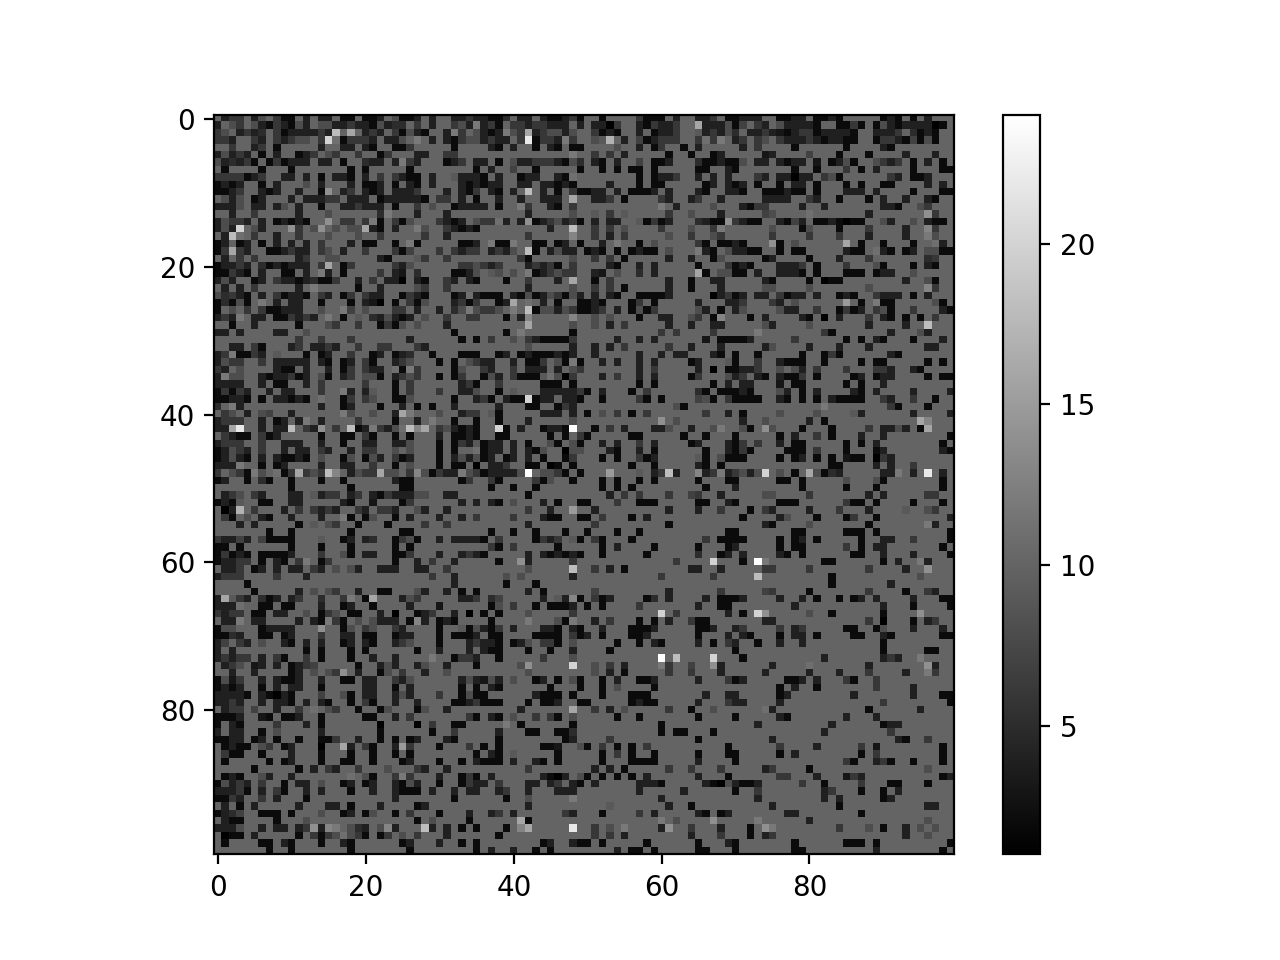

In [72]:
plot.figure()
plot.imshow(weights_major, cmap=cm.gray)
plot.colorbar()
plot.show()

In [63]:
from sklearn.manifold import MDS

In [64]:
mds = MDS(n_components=2, metric=True, dissimilarity='precomputed', n_jobs=1, verbose=1)

In [65]:
fitted = mds.fit_transform(weights_major)

breaking at iteration 286 with stress 58290.3197552
breaking at iteration 255 with stress 61011.780421
breaking at iteration 251 with stress 57892.1734832


In [66]:
fitted.shape

(100, 2)

<IPython.core.display.Javascript object>


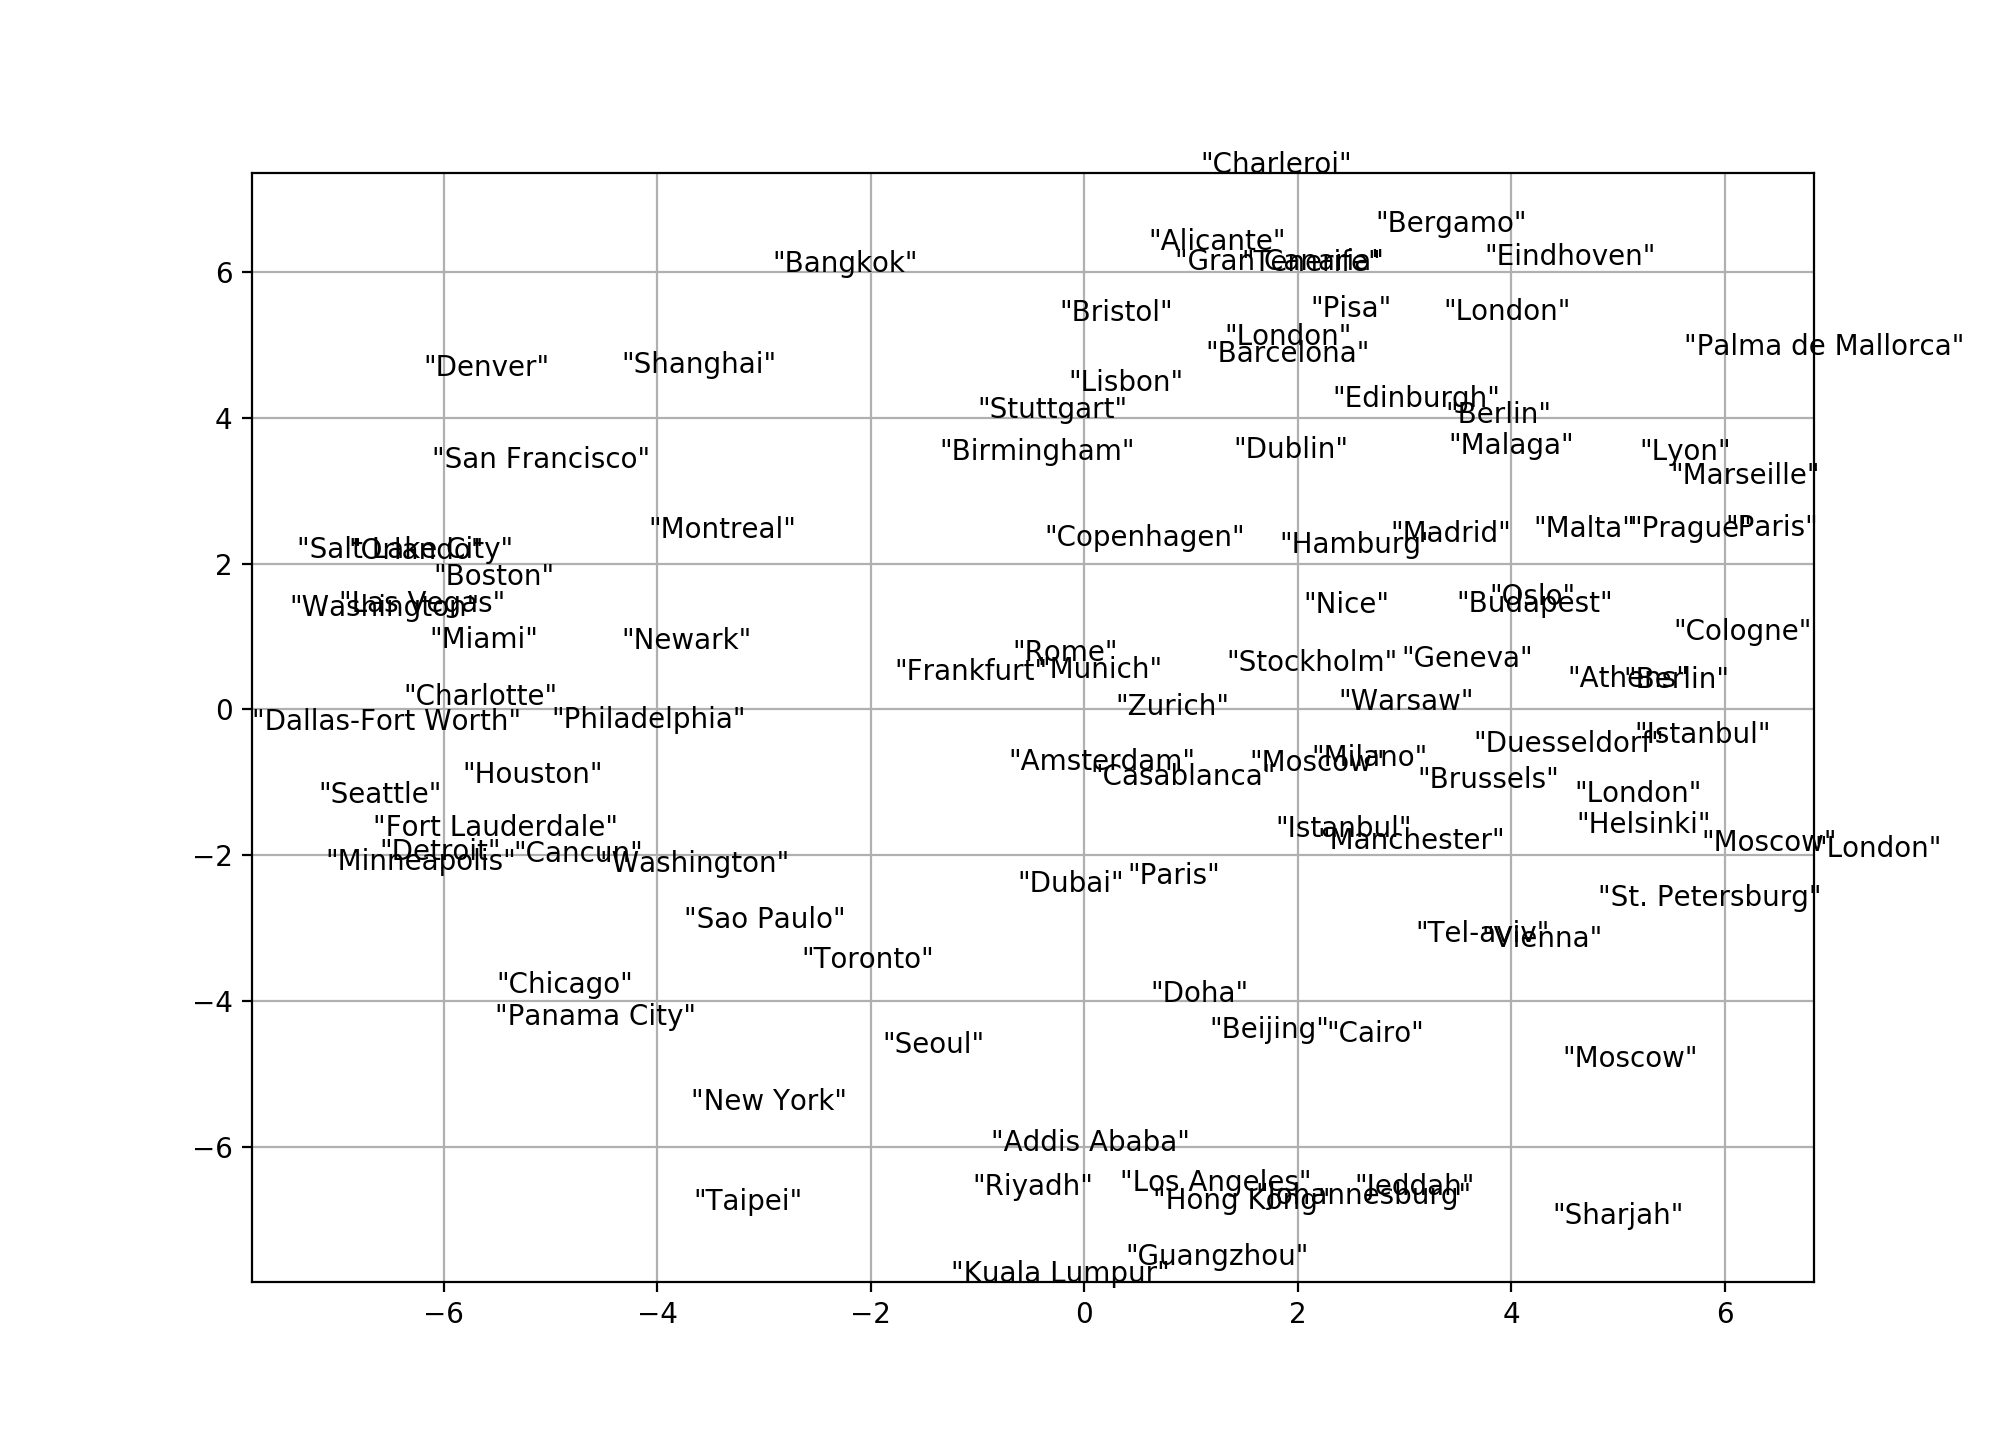

In [69]:
plot.figure()

for ii in xrange(fitted.shape[0]): #sorted_idx[:100]:
    airport = idx2airport[sorted_idx[ii]]
    aid = airport2aid[airport]
    if aid not in aid2city:
        continue
    city = aid2city[aid]
    plot.annotate(city.decode('utf8'), (fitted[ii,0], fitted[ii,1]))
    
plot.xlim([fitted.min(0)[0], fitted.max(0)[0]])
plot.ylim([fitted.min(0)[1], fitted.max(0)[1]])
plot.grid('on')

plot.show()

In [42]:
airport2aid

OrderedDict([('AER', '2965'),
             ('KZN', '2990'),
             ('ASF', '2966'),
             ('MRV', '2962'),
             ('CEK', '2968'),
             ('OVB', '4078'),
             ('DME', '4029'),
             ('NBC', '6969'),
             ('TGK', '\\N'),
             ('UUA', '6160'),
             ('EGO', '6156'),
             ('KGD', '2952'),
             ('GYD', '2922'),
             ('LED', '2948'),
             ('SVX', '2975'),
             ('NJC', '2972'),
             ('NUX', '4364'),
             ('BTK', '2936'),
             ('IKT', '2937'),
             ('HTA', '2935'),
             ('KCK', '\\N'),
             ('ODO', '8944'),
             ('UKX', '6924'),
             ('ULK', '9026'),
             ('YKS', '2923'),
             ('MJZ', '2925'),
             ('AYP', '2786'),
             ('LIM', '2789'),
             ('CUZ', '2812'),
             ('PEM', '2808'),
             ('HUU', '6067'),
             ('IQT', '2801'),
             ('PCL', '2781'),
            